**Data Preprocessing and cleaning project**

**Imports**

In [903]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from datasist.structdata import detect_outliers 

**Reading data into pandas data frame**

In [904]:
df=pd.read_csv("googleplaystore.csv")

df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10551,FK Macva Sabac,SPORTS,NaN,3,26M,10+,Free,0,Everyone,Sports,"February 19, 2018",1.0,4.1 and up
1498,Bathroom Decorating Ideas,HOUSE_AND_HOME,4.1,2427,5.3M,"500,000+",Free,0,Everyone,House & Home,"March 12, 2015",1.4,3.0 and up
1548,V380s,LIBRARIES_AND_DEMO,3.2,1919,8.1M,"500,000+",Free,0,Everyone,Libraries & Demo,"July 11, 2018",5.9.1,4.1 and up
4749,X Launcher: With OS11 Style Theme & Control Ce...,ART_AND_DESIGN,4.7,5754,4.4M,"100,000+",Free,0,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
8477,DK Live - Sports Play by Play,SPORTS,3.9,255,19M,"100,000+",Free,0,Everyone,Sports,"May 22, 2018",2.1.4,4.4 and up
3587,Kids Videos,PARENTING,4.1,559,6.4M,"100,000+",Free,0,Everyone,Parenting,"May 20, 2018",1.3.1,4.1 and up
3142,Foursquare Swarm: Check In,TRAVEL_AND_LOCAL,3.9,421800,Varies with device,"10,000,000+",Free,0,Teen,Travel & Local,"July 27, 2018",Varies with device,Varies with device
6957,BX Diff - Crypto Coins Checker,FINANCE,4.6,83,4.0M,"5,000+",Free,0,Everyone,Finance,"July 16, 2018",1.0.21,4.4 and up
1032,AAS-IN-ASIA 2018,EVENTS,NaN,3,11M,100+,Free,0,Everyone,Events,"July 4, 2018",1.1.9,4.1 and up
6609,Blood Pressure Diary,FAMILY,4.6,47,3.3M,"5,000+",Free,0,Everyone,Simulation,"August 1, 2018",1.1,4.0.3 and up


In [905]:
print(df.shape)

(10841, 13)


In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [907]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**check for duplicates**

In [908]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [909]:
df["Android Ver"].value_counts() 

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

android version has only two null entries so we can drop them safely

In [910]:
indices=df[df["Android Ver"].isnull()].index
df.drop(index=indices,inplace=True)
df.shape


(10355, 13)

In [911]:

index_of_null=df[df["Rating"].isna()].index
index_of_null


Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,   185,
       ...
       10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835, 10838],
      dtype='int64', length=1465)

**Fill half the null values with the mean and the other with the mode**

In [912]:
rating_mean=np.mean(df["Rating"])
rating_mode=df["Rating"].mode()[0]


half_indices=index_of_null[:len(index_of_null)//2]
other_half=index_of_null[len(index_of_null)//2:]

df.loc[half_indices,"Rating"]=rating_mean
df.loc[other_half,"Rating"]=rating_mode
df["Rating"].isnull().sum()
df["Rating"].isnull().sum()

0

In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10355 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10355 non-null  object 
 1   Category        10355 non-null  object 
 2   Rating          10355 non-null  float64
 3   Reviews         10355 non-null  object 
 4   Size            10355 non-null  object 
 5   Installs        10355 non-null  object 
 6   Type            10354 non-null  object 
 7   Price           10355 non-null  object 
 8   Content Rating  10355 non-null  object 
 9   Genres          10355 non-null  object 
 10  Last Updated    10355 non-null  object 
 11  Current Ver     10347 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


type column contain only one null so we can drop it safely

In [914]:
index=df[df["Type"].isnull()].index
df.drop(index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10354 non-null  object 
 1   Category        10354 non-null  object 
 2   Rating          10354 non-null  float64
 3   Reviews         10354 non-null  object 
 4   Size            10354 non-null  object 
 5   Installs        10354 non-null  object 
 6   Type            10354 non-null  object 
 7   Price           10354 non-null  object 
 8   Content Rating  10354 non-null  object 
 9   Genres          10354 non-null  object 
 10  Last Updated    10354 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Drop null values in current version

In [915]:
df.dropna(inplace=True)
df.sample(11)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
528,Adult Dirty Emojis,DATING,2.8,80,5.5M,"10,000+",Free,0,Teen,Dating,"November 6, 2017",1.0,4.0.3 and up
7369,Green Build - An unofficial Travis CI client,TOOLS,3.9,7,3.2M,100+,Free,0,Everyone,Tools,"June 6, 2018",1.2.1,5.0 and up
3341,Keypad Lock Screen,TOOLS,4.2,428581,4.7M,"10,000,000+",Free,0,Everyone,Tools,"July 17, 2018",1.33,4.0 and up
5863,ai.type Free Emoji Keyboard,PERSONALIZATION,4.3,647721,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"July 24, 2018",Varies with device,Varies with device
1088,Bank of Brazil,FINANCE,4.5,1336246,39M,"10,000,000+",Free,0,Everyone,Finance,"August 3, 2018",6.39.1.4,4.1 and up
10630,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34M,"100,000+",Free,0,Everyone,Health & Fitness,"July 10, 2018",4.2.1,7.0 and up
7702,CP Cloud,BUSINESS,4.4,3,5.4M,100+,Free,0,Everyone,Business,"July 24, 2018",2.5,4.4 and up
10398,HD Themes Volvo FH Trucks,PERSONALIZATION,4.4,40,13M,"5,000+",Free,0,Teen,Personalization,"June 21, 2016",1.0,2.3.3 and up
8557,DM airdisk Pro,TOOLS,3.2,11,36M,"1,000+",Free,0,Everyone,Tools,"September 20, 2017",2.4.0,4.0.3 and up
9168,Mass Effect: Andromeda APEX HQ,GAME,3.4,4490,92M,"100,000+",Free,0,Everyone 10+,Action,"September 21, 2017",1.18.1,4.1 and up


**Apply binary encoding to the nominal field and drop the original column**

In [916]:

encoder=ce.BinaryEncoder(cols=["Category"])
encoded=encoder.fit_transform(df["Category"])
encoder2=ce.BinaryEncoder(cols=["Genres"])
encoded2=encoder2.fit_transform(df["Genres"])
encoder3=ce.BinaryEncoder(cols=["Content Rating"])
encoded3=encoder3.fit_transform(df["Content Rating"])
df=pd.concat([df,encoded2],axis=1)
df=pd.concat([df,encoded3],axis=1)
df.describe()

,Rating,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,Content Rating_0,Content Rating_1,Content Rating_2
count,10346.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.00000,10346.000000,10346.000000,10346.000000
mean,4.202890,0.387879,0.293543,0.530930,0.635995,0.598492,0.500290,0.41156,0.043688,0.147303,0.845834
std,0.487193,0.487290,0.455407,0.499067,0.481173,0.490227,0.500024,0.49214,0.204411,0.354425,0.361125
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,4.300000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
75%,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [917]:
encoded3["Content Rating_2"].value_counts()

Content Rating_2
1    8751
0    1595
Name: count, dtype: int64

In [918]:
df=pd.concat([df,encoded],axis=1)


In [919]:
df["Installs"].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

**Apply encoding to ordinal fields**

In [920]:

df["Installs"] = df["Installs"].astype(str)

df["Installs"] = df["Installs"].str.strip()  # Remove extra spaces
df["Installs"] = df["Installs"].str.replace(",", "")  # Remove commas
df["Installs"] = df["Installs"].str.replace("+", "")
transform = {'0': 1, '1': 2, '5': 3, '10': 4, '50': 5,'100': 6, '500': 7, '1000': 8, '5000': 9,
             '10000': 10, '50000': 11, '100000': 12,'500000': 13, '1000000': 14, '5000000': 15,
             '10000000': 16, '50000000': 17, '100000000': 18, '500000000': 19, '1000000000': 20}
df["Installs"] = df["Installs"].map(transform)
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               10346 non-null  object 
 1   Category          10346 non-null  object 
 2   Rating            10346 non-null  float64
 3   Reviews           10346 non-null  object 
 4   Size              10346 non-null  object 
 5   Installs          10346 non-null  int64  
 6   Type              10346 non-null  object 
 7   Price             10346 non-null  object 
 8   Content Rating    10346 non-null  object 
 9   Genres            10346 non-null  object 
 10  Last Updated      10346 non-null  object 
 11  Current Ver       10346 non-null  object 
 12  Android Ver       10346 non-null  object 
 13  Genres_0          10346 non-null  int64  
 14  Genres_1          10346 non-null  int64  
 15  Genres_2          10346 non-null  int64  
 16  Genres_3          10346 non-null  int64  
 17

type field is redundant so we can drop it

In [921]:
df.drop("Type",axis=1,inplace=True)

fix size field

In [922]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [923]:
df = df[df["Size"] != "Varies with device"]
def convert_size(size):
    if size[-1] == 'M' or size[-1] == 'm':
        # Remove 'M' and keep the numeric value
        return float(size[:-1])
    elif size[-1] == 'K' or size[-1] == 'k':
        # Remove 'K', convert to float, and multiply by 0.001 to represent in MB
        return float(size[:-1]) * 0.001
    else:
        # Keep the value as is if it's not 'M' or 'K'
        return float(size[:-1])

# Apply the function to the "Size" column
df["Size"] = df["Size"].apply(lambda x :convert_size(x))
df['Size']


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835     9.6
10836    53.0
10837     3.6
10838     9.5
10840    19.0
Name: Size, Length: 8821, dtype: float64

In [924]:
df["Size"].value_counts()

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,...,Genres_6,Content Rating_0,Content Rating_1,Content Rating_2,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10,0,Everyone,Art & Design,"January 7, 2018",...,1,0,0,1,0,0,0,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,13,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,1,0,0,0,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,0,Everyone,Art & Design,"August 1, 2018",...,1,0,0,1,0,0,0,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,17,0,Teen,Art & Design,"June 8, 2018",...,1,0,1,0,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,1,0,0,1,0,0,0,0,0,1
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,11,0,Everyone,Art & Design,"March 26, 2017",...,1,0,0,1,0,0,0,0,0,1
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,11,0,Everyone,Art & Design,"April 26, 2018",...,1,0,0,1,0,0,0,0,0,1
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,14,0,Everyone,Art & Design,"June 14, 2018",...,1,0,0,1,0,0,0,0,0,1
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,14,0,Everyone,Art & Design,"September 20, 2017",...,1,0,0,1,0,0,0,0,0,1
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10,0,Everyone,Art & Design;Creativity,"July 3, 2018",...,1,0,0,1,0,0,0,0,0,1


**make the update date more useful by decreasing number of unique values**

In [925]:
def convert(date):
    year=date.split(',')[1]
    return year 
    
df["update year"]=df["Last Updated"].apply(lambda x: convert(x))

    

In [926]:
df.drop("Last Updated",axis=1,inplace=True)

In [927]:
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Current Ver,...,Content Rating_0,Content Rating_1,Content Rating_2,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,update year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10,0,Everyone,Art & Design,1.0.0,...,0,0,1,0,0,0,0,0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,13,0,Everyone,Art & Design;Pretend Play,2.0.0,...,0,0,1,0,0,0,0,0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,0,Everyone,Art & Design,1.2.4,...,0,0,1,0,0,0,0,0,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,17,0,Teen,Art & Design,Varies with device,...,0,1,0,0,0,0,0,0,1,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,0,Everyone,Art & Design;Creativity,1.1,...,0,0,1,0,0,0,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9.6,4,0,Everyone,Business,1.1.5,...,0,0,1,0,0,0,1,0,1,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,9,0,Everyone,Education,1.48,...,0,0,1,0,1,0,0,1,1,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,6,0,Everyone,Education,1.0,...,0,0,1,0,1,0,0,1,1,2018
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,8,0,Everyone,Medical,1.0,...,0,0,1,0,1,0,1,0,0,2017


**Assuming the current version do not affect the classification**

In [928]:
df.drop("Current Ver",axis=1,inplace=True)

**Fixing android verion**

In [929]:
df["Android Ver"].value_counts()
df= df[df["Android Ver"]!="Varies with device"]
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.0 and up', '2.3.3 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [930]:
trans = {
    '1.0 and up': 1, '1.5 and up': 2, '1.6 and up': 3, 
    '2.0 and up': 4, '2.0.1 and up': 5, '2.1 and up': 6, 
    '2.2 and up': 7, '2.2 - 7.1.1': 8, '2.3 and up': 9, '2.3.3 and up': 10, 
    '3.0 and up': 11, '3.1 and up': 12, '3.2 and up': 13, '4.0 and up': 14, 
    '4.0.3 and up': 15, '4.0.3 - 7.1.1': 16, '4.1 and up': 17, 
    '4.1 - 7.1.1': 18, '4.2 and up': 19, '4.3 and up': 20, '4.4 and up': 21, 
    '4.4W and up': 22, '5.0 and up': 23, 
    '5.0 - 6.0': 24, '5.0 - 7.1.1': 25, '5.0 - 8.0': 26, '5.1 and up': 27, 
    '6.0 and up': 28, '7.0 and up': 29, '7.0 - 7.1.1': 30, '7.1 and up': 31, 
    '8.0 and up': 32
}
df["Android Ver"]=df["Android Ver"].map(trans)


C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\1110511502.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Android Ver"]=df["Android Ver"].map(trans)


**Fix the Data Types**

In [931]:
df.convert_dtypes()


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Android Ver,...,Content Rating_0,Content Rating_1,Content Rating_2,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,update year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10,0,Everyone,Art & Design,15,...,0,0,1,0,0,0,0,0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,13,0,Everyone,Art & Design;Pretend Play,15,...,0,0,1,0,0,0,0,0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15,0,Everyone,Art & Design,15,...,0,0,1,0,0,0,0,0,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,17,0,Teen,Art & Design,19,...,0,1,0,0,0,0,0,0,1,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,12,0,Everyone,Art & Design;Creativity,21,...,0,0,1,0,0,0,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,7,0,Everyone,Education,17,...,0,0,1,0,1,0,0,1,1,2017
10835,FR Forms,BUSINESS,4.4,0,9.6,4,0,Everyone,Business,14,...,0,0,1,0,0,0,1,0,1,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,9,0,Everyone,Education,17,...,0,0,1,0,1,0,0,1,1,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,6,0,Everyone,Education,17,...,0,0,1,0,1,0,0,1,1,2018


In [932]:
df["Android Ver"].unique()

array([15, 19, 21,  9, 11, 17, 14,  7, 23, 28,  3,  6, 27,  2, 29, 20, 16,
        4, 10, 13, 22, 31, 30, 32, 26, 12,  5, 18, 24,  1,  8, 25],
      dtype=int64)

In [933]:

df["update year"]=df["update year"].astype(int)
df["Reviews"]=df["Reviews"].astype(int)
df["Android Ver"]=df["Android Ver"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8768 entries, 0 to 10838
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8768 non-null   object 
 1   Category          8768 non-null   object 
 2   Rating            8768 non-null   float64
 3   Reviews           8768 non-null   int32  
 4   Size              8768 non-null   float64
 5   Installs          8768 non-null   int64  
 6   Price             8768 non-null   object 
 7   Content Rating    8768 non-null   object 
 8   Genres            8768 non-null   object 
 9   Android Ver       8768 non-null   int32  
 10  Genres_0          8768 non-null   int64  
 11  Genres_1          8768 non-null   int64  
 12  Genres_2          8768 non-null   int64  
 13  Genres_3          8768 non-null   int64  
 14  Genres_4          8768 non-null   int64  
 15  Genres_5          8768 non-null   int64  
 16  Genres_6          8768 non-null   int64  
 17 

C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\3208664122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["update year"]=df["update year"].astype(int)
C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\3208664122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"]=df["Reviews"].astype(int)
C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\3208664122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

fix price

In [934]:
def fix(x):
    if x[0]=='$':
        return x[1:]
    else:
        return x
df["Price"]=df["Price"].apply(lambda x : fix(x))
df["Price"]=df["Price"].astype(float)

C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\126503136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].apply(lambda x : fix(x))
C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\126503136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].astype(float)


In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8768 entries, 0 to 10838
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8768 non-null   object 
 1   Category          8768 non-null   object 
 2   Rating            8768 non-null   float64
 3   Reviews           8768 non-null   int32  
 4   Size              8768 non-null   float64
 5   Installs          8768 non-null   int64  
 6   Price             8768 non-null   float64
 7   Content Rating    8768 non-null   object 
 8   Genres            8768 non-null   object 
 9   Android Ver       8768 non-null   int32  
 10  Genres_0          8768 non-null   int64  
 11  Genres_1          8768 non-null   int64  
 12  Genres_2          8768 non-null   int64  
 13  Genres_3          8768 non-null   int64  
 14  Genres_4          8768 non-null   int64  
 15  Genres_5          8768 non-null   int64  
 16  Genres_6          8768 non-null   int64  
 17 

**DATA STATISTICS and VISUALIZATION**

before remoing outliers

(array([  17.,   18.,   38.,   71.,  126.,  403.,  755., 2031., 3730.,
        1579.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

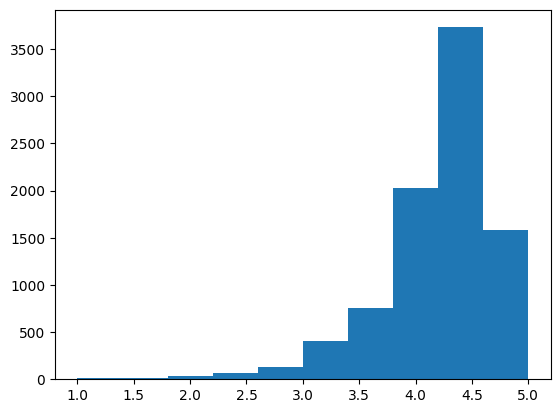

In [936]:
plt.hist(df["Rating"])

(array([8.656e+03, 6.500e+01, 2.000e+01, 1.000e+01, 5.000e+00, 4.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([       0. ,  4489388.8,  8978777.6, 13468166.4, 17957555.2,
        22446944. , 26936332.8, 31425721.6, 35915110.4, 40404499.2,
        44893888. ]),
 <BarContainer object of 10 artists>)

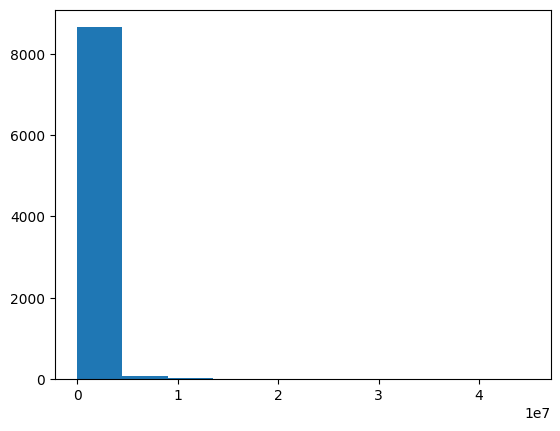

In [937]:
plt.hist(df["Reviews"])

(array([3973., 1578., 1114.,  623.,  462.,  320.,  230.,  158.,  115.,
         195.]),
 array([8.500000e-03, 1.000765e+01, 2.000680e+01, 3.000595e+01,
        4.000510e+01, 5.000425e+01, 6.000340e+01, 7.000255e+01,
        8.000170e+01, 9.000085e+01, 1.000000e+02]),
 <BarContainer object of 10 artists>)

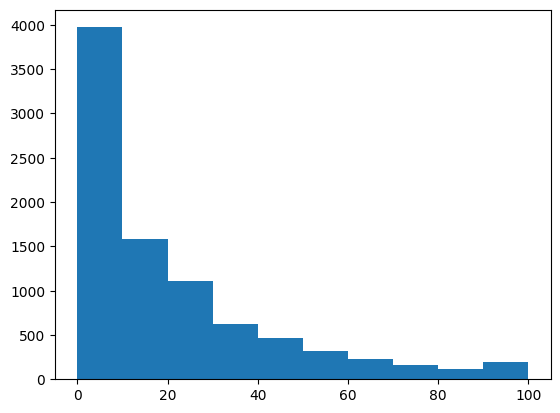

In [938]:
plt.hist(df["Size"])

(array([1.000e+00, 1.500e+01, 2.500e+01, 1.010e+02, 0.000e+00, 1.960e+02,
        4.360e+02, 7.310e+02, 1.696e+03, 5.567e+03]),
 array([2010. , 2010.8, 2011.6, 2012.4, 2013.2, 2014. , 2014.8, 2015.6,
        2016.4, 2017.2, 2018. ]),
 <BarContainer object of 10 artists>)

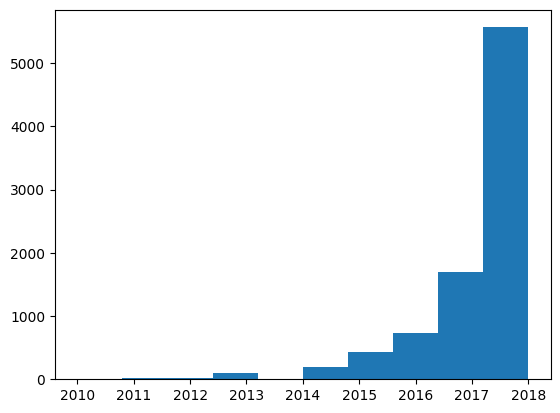

In [939]:
plt.hist(df["update year"])

(array([  78.,  452.,  890., 1171., 1440., 1454., 1689., 1234.,  331.,
          29.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

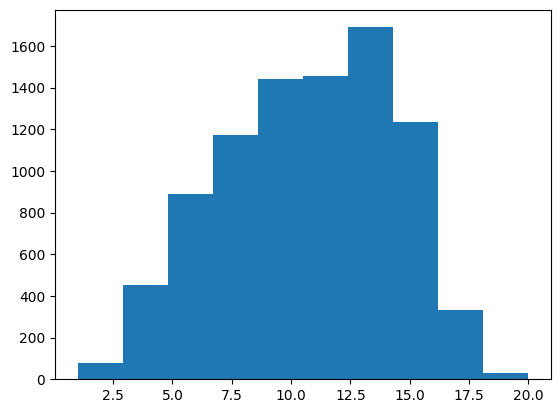

In [940]:
plt.hist(df["Installs"])

(array([8.744e+03, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.600e+01]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <BarContainer object of 10 artists>)

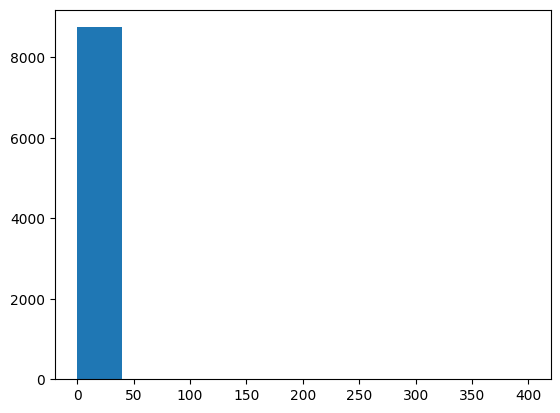

In [941]:
plt.hist(df["Price"])

(array([ 165.,  376.,  901.,  282., 2719., 2616., 1069.,  513.,   78.,
          49.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

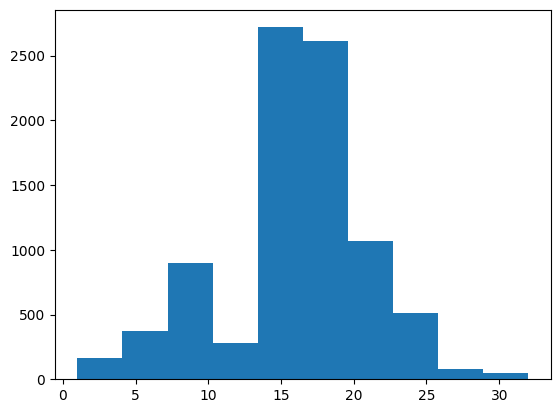

In [942]:
plt.hist(df["Android Ver"])

C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\569482319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_rating"]=df["Content Rating_0"].astype(str)+df["Content Rating_1"].astype(str)+df["Content Rating_2"].astype(str)


(array([7.145e+03, 0.000e+00, 9.410e+02, 0.000e+00, 3.110e+02, 0.000e+00,
        3.670e+02, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

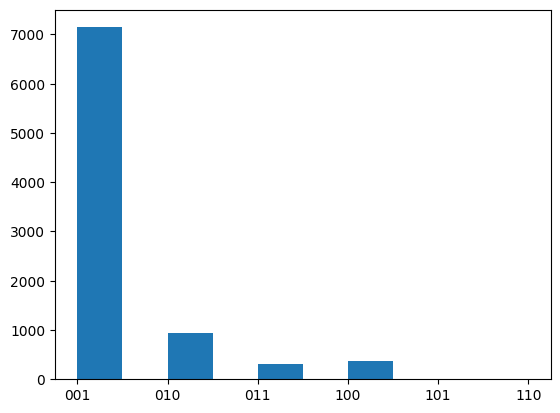

In [943]:
df["content_rating"]=df["Content Rating_0"].astype(str)+df["Content Rating_1"].astype(str)+df["Content Rating_2"].astype(str)

plt.hist(df["content_rating"])
#removing outliers from the data will corrupt it

installs , size and android version seems to be ok with no outliers

REMOVE OUTLIERS

In [944]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Android Ver', 'Genres_0', 'Genres_1',
       'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6',
       'Content Rating_0', 'Content Rating_1', 'Content Rating_2',
       'Category_0', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'update year', 'content_rating'],
      dtype='object')

In [945]:
names=df["App"]
df.drop(columns="App",inplace=True)
df.shape


C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\2885473464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="App",inplace=True)


(8768, 27)

In [946]:
df["content_rating"]=df["Content Rating_0"].astype(str)+df["Content Rating_1"].astype(str)+df["Content Rating_2"].astype(str)
df["Content Rating_0"].shape
df["category"]=df["Category_0"].astype(str)+df["Category_1"].astype(str)+df["Category_2"].astype(str)+df["Category_3"].astype(str)+df["Category_4"].astype(str)+df["Category_5"].astype(str)
df["category"]=df["category"].astype(int)

df["content_rating"]=df["content_rating"].astype(int)
print(df["content_rating"].value_counts())
cols_with_outliers=['update year',"Reviews","Rating"]


outliers_indices=detect_outliers(df,0,cols_with_outliers)
df.drop(outliers_indices,inplace=True)

content_rating
1      7145
10      941
100     367
11      311
101       2
110       2
Name: count, dtype: int64


C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\2796162279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_rating"]=df["Content Rating_0"].astype(str)+df["Content Rating_1"].astype(str)+df["Content Rating_2"].astype(str)
C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\2796162279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"]=df["Category_0"].astype(str)+df["Category_1"].astype(str)+df["Category_2"].astype(str)+df["Category_3"].astype(str)+df["Category_4"].astype(str

(array([6.067e+03, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.500e+01]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <BarContainer object of 10 artists>)

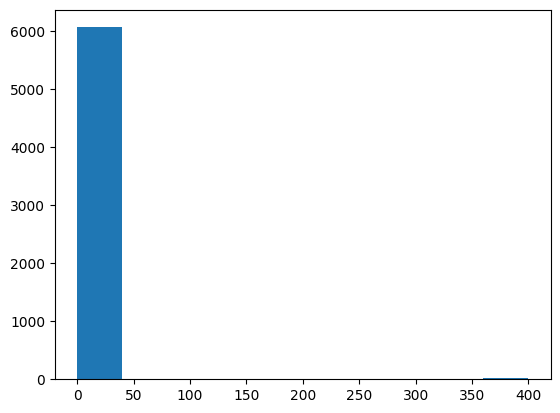

In [947]:
plt.hist(df["Price"])

(array([  78.,  128.,  539.,  164., 2006., 1893.,  777.,  397.,   63.,
          44.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

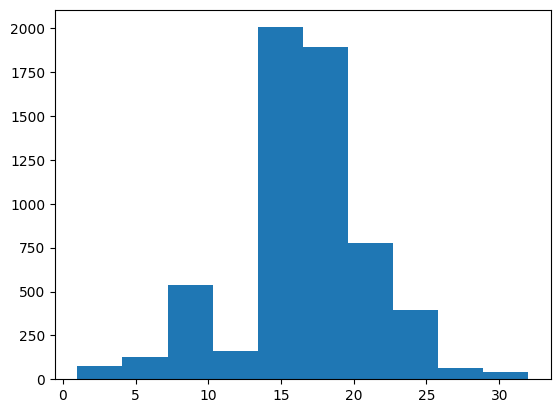

In [948]:
plt.hist(df["Android Ver"])

(array([  76.,  413.,  763.,  268., 1027., 1117.,  834., 1340.,  248.,
           3.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

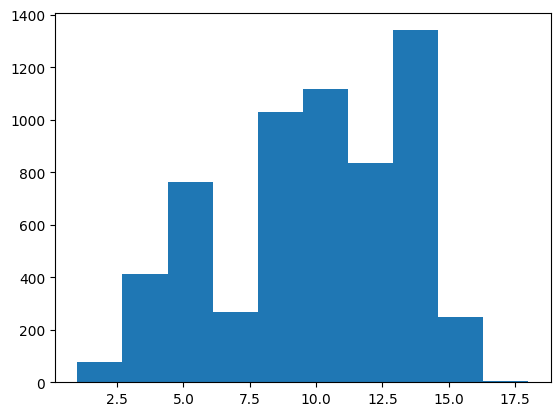

In [949]:
plt.hist(df["Installs"])

(array([ 168.,  255.,  354.,  244.,  726., 1604., 1120.,  832.,  463.,
         323.]),
 array([3.3 , 3.47, 3.64, 3.81, 3.98, 4.15, 4.32, 4.49, 4.66, 4.83, 5.  ]),
 <BarContainer object of 10 artists>)

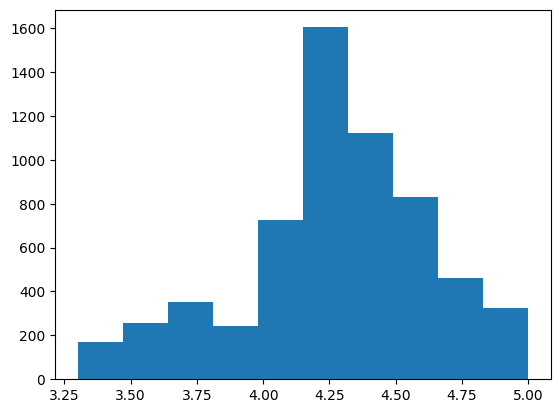

In [950]:
plt.hist(df["Rating"])

(array([4686.,  404.,  239.,  165.,  146.,  121.,  105.,   96.,   72.,
          55.]),
 array([    0.,  5538., 11076., 16614., 22152., 27690., 33228., 38766.,
        44304., 49842., 55380.]),
 <BarContainer object of 10 artists>)

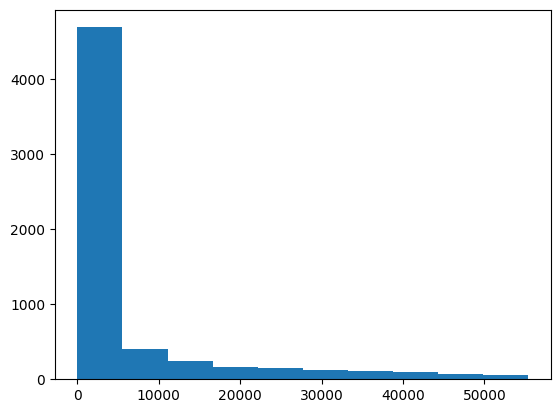

In [951]:
plt.hist(df["Reviews"])

(array([2910., 1176.,  805.,  394.,  279.,  170.,  128.,   74.,   64.,
          89.]),
 array([8.500000e-03, 1.000765e+01, 2.000680e+01, 3.000595e+01,
        4.000510e+01, 5.000425e+01, 6.000340e+01, 7.000255e+01,
        8.000170e+01, 9.000085e+01, 1.000000e+02]),
 <BarContainer object of 10 artists>)

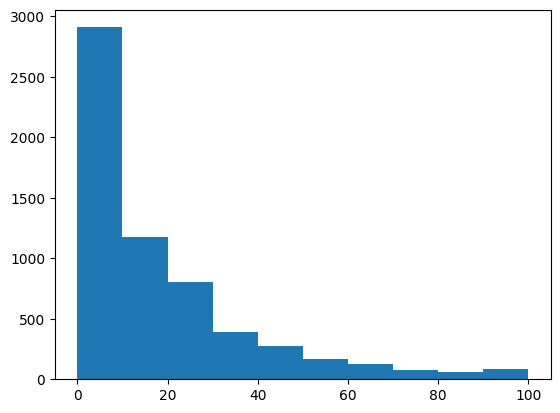

In [952]:
plt.hist(df["Size"])

C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\3025127880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"]=df["Category_0"].astype(str)+df["Category_1"].astype(str)+df["Category_2"].astype(str)+df["Category_3"].astype(str)+df["Category_4"].astype(str)+df["Category_5"].astype(str)


(array([ 310.,  513.,  246.,  375.,  289., 2286.,  387.,  835.,  499.,
         349.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

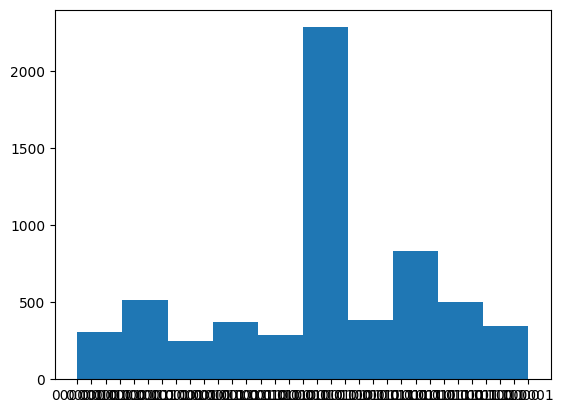

In [953]:
df["category"]=df["Category_0"].astype(str)+df["Category_1"].astype(str)+df["Category_2"].astype(str)+df["Category_3"].astype(str)+df["Category_4"].astype(str)+df["Category_5"].astype(str)
plt.hist(df["category"])

(array([5671.,  156.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         262.]),
 array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.]),
 <BarContainer object of 10 artists>)

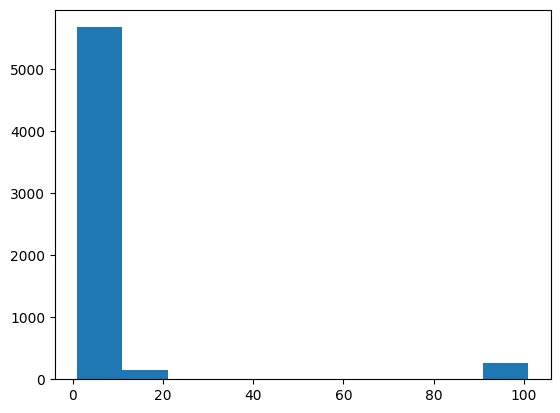

In [954]:


plt.hist(df["content_rating"]) #cannot be treated as outlier

**Answering questions**

What is the most expensive app on the Play Store?


In [955]:
df["Price"].max()

400.0

Which genre has the highest number of apps?

In [956]:
df["Genres"].mode()[0]

'Tools'

What is the average size of free vs. paid apps?

In [957]:
free=df[df["Price"]==0]
free_avg_price=np.mean(free["Size"])
paid=df[df["Price"]!=0]

paid_avg_price=np.mean(paid["Size"])

print("average size for free apps is "+str(free_avg_price))
print("average size for paid apps is "+str(paid_avg_price))

average size for free apps is 18.85187415269354
average size for paid apps is 21.769327122153207


What are the top 5 most expensive apps with a perfect rating (5)?

In [958]:
df["App"]=names
sorted=df.sort_values(by="Price",ascending=False)
sorted_expensive=sorted[sorted["Rating"]==5].head(5)

sorted_expensive_prices=sorted_expensive["Price"]
print(sorted_expensive_prices)
namess=list(sorted_expensive["App"])
print("the top 5 most expensive apps are :"+str(namess)+"         \n")

5489    29.99
7204     4.99
5246     4.99
5237     3.99
8287     3.04
Name: Price, dtype: float64
the top 5 most expensive apps are :['AP Art History Flashcards', 'TI-84 CE Graphing Calculator Manual TI 84', "Hey AJ! It's Bedtime!", "Hey AJ! It's Saturday!", 'AC DC Power Monitor']         



C:\Users\kareem\AppData\Local\Temp\ipykernel_15568\2909371250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["App"]=names


How many apps have received more than 50K reviews?

In [959]:
rev=len(df[df["Reviews"]>=50000])
rev

54

What is the average price of apps, grouped by genre and number of installs?

In [960]:
installs_grouped=df.groupby("Installs")
mean_by_installs = installs_grouped.agg({'Price': 'mean'})
genre_grouped=df.groupby("Genres")
mean_by_genre=genre_grouped.agg({"Price": "mean"})
print(mean_by_installs)
print(mean_by_genre)

              Price
Installs           
1         77.339231
2          2.782857
3          0.320822
4          0.940294
5          0.462948
6          1.154763
7          0.308731
8          2.696373
9          3.705098
10         2.896173
11         1.522141
12         0.800851
13         0.038998
14         0.018185
15         0.000000
16         0.000000
17         0.000000
18         0.000000
                                          Price
Genres                                         
Action                                 0.252761
Action;Action & Adventure              1.121250
Adventure                              1.018542
Adventure;Action & Adventure           1.663333
Adventure;Brain Games                  2.990000
...                                         ...
Trivia;Education                       0.000000
Video Players & Editors                0.000000
Video Players & Editors;Music & Video  0.000000
Weather                                0.391667
Word                    

How many apps have a rating higher than 4.7, and what is their average price?

In [961]:
hr=df[df["Rating"]>4.7]
print(len(hr))
prices=np.mean(hr["Price"])
print(prices)
#very low because most of them is free

490
0.4051632653061225


What is Google's estimated revenue from apps with 5,000,000+ installs?

In [962]:
apps=df[df["Installs"]>=15]
apps = apps.reset_index(drop=True)
inv_transform = {
    1: 0, 2: 1, 3: 5, 4: 10, 
    5: 50, 6: 100, 7: 500, 8: 1000, 
    9: 5000, 10: 10000, 11: 50000, 
    12: 100000, 13: 500000, 14: 1000000, 
    15: 5000000, 16: 10000000, 17: 50000000, 
    18: 100000000, 19: 500000000,20: 1000000000
}
apps["Install_Count"] = apps["Installs"].map(inv_transform)
apps["Revenue"] = apps["Price"] * apps["Install_Count"]
total_revenue = apps["Revenue"].sum()

apps[apps["Price"]>0]


,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Android Ver,Genres_0,...,Category_2,Category_3,Category_4,Category_5,update year,content_rating,category,App,Install_Count,Revenue


**all the apps above 5000000 installs are free (so the revenue from these apps is ZERO)**

What are the maximum and minimum sizes of free vs. paid apps?


In [963]:
free=df[df["Price"]==0]
min_free=np.min(free["Size"])
max_free=np.max(free["Size"])


paid=df[df["Price"]>0]
min_paid=np.min(paid["Size"])
max_paid=np.max(paid["Size"])

print("most small free: "+ str(min_free))
print("most large free : "+ str(max_free))
print("most small paid: "+ str(min_paid))
print("most large paid : "+ str(max_paid))

most small free: 0.0085
most large free : 100.0
most small paid: 0.018000000000000002
most large paid : 100.0


Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [964]:
#########################################################################

How many apps exist for each type (free/paid) across different content ratings?

In [965]:
free=df[df["Price"]==0]
print("FREE : \n")
print(free.groupby("Content Rating").size())
paid=df[df["Price"]>0]
print("\nPAID : \n")
print(paid.groupby("Content Rating").size())


FREE : 

Content Rating
Adults only 18+       2
Everyone           4682
Everyone 10+        136
Mature 17+          248
Teen                538
dtype: int64

PAID : 

Content Rating
Everyone        414
Everyone 10+     20
Mature 17+       12
Teen             37
dtype: int64


How many apps are compatible with Android version 4.x?

In [966]:
#from transformation matrix 4.x is represented by values from 14 to 22 
and_ver=df[df["Android Ver"]>=14 ]
and_ver=and_ver[and_ver["Android Ver"]<=22]
num=len(and_ver)
num

4676